# Build, Train & Test a Multilayer Neural Networks using TensorFlow


### Goals: 
- Intro: build and train a feed forward neural network using the `TensorFlow` framework.
- The SGD method will be used for training to apply automatic differentiation based on TensorFlow.
- Tune the hyperparameters and modify the structure of your NN to achieve the highest accuracy.
- Use Tensorboard to visualize the graph and results.

### Dataset:
- Digits: 10 class handwritten digits
- It will automatically be downloaded once you run the provided code using the scikit-learn library.
- Check for info in the following websites:
- http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
- http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

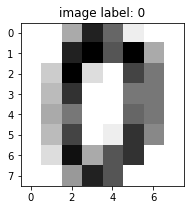

In [2]:
sample_index = 0
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

<Figure size 432x288 with 0 Axes>

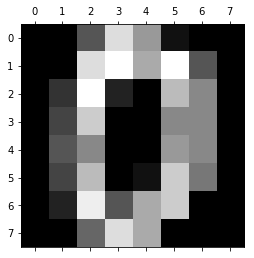

In [3]:
plt.gray() 
plt.matshow(digits.images[sample_index]) 
plt.show()

### Preprocessing

- normalization of your input data
- train/test split

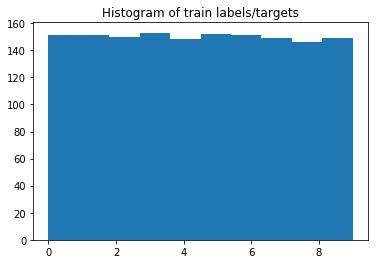

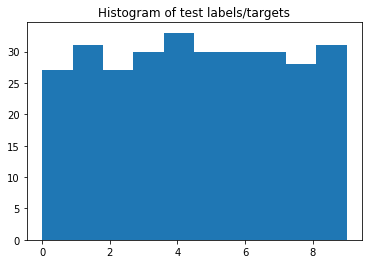

In [4]:
from sklearn import preprocessing
import numpy
#numpy.set_printoptions(threshold=numpy.nan)

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train = data[0:1500,:]
y_train = target[0:1500]

X_test = data[1500:,:]
y_test = target[1500:]

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()

# print(scaler.mean_)
# print(scaler.scale_)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Check that the train and test targets/labels are balanced within each set
plt.hist(y_train)  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of train labels/targets")
plt.show()

plt.hist(y_test)  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of test labels/targets")
plt.show()


Let's display the one of the transformed sample (after feature standardization):

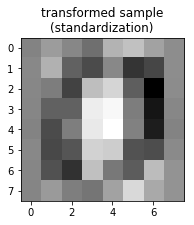

In [5]:
sample_index = 0
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

<Figure size 432x288 with 0 Axes>

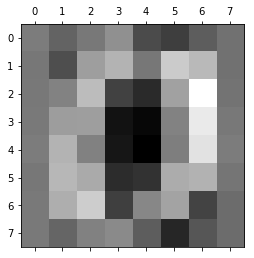

In [6]:
plt.gray() 
plt.matshow(X_train[sample_index].reshape(8,8)) 
plt.show()

The scaler objects makes it possible to recover the original sample:

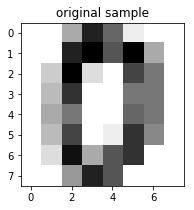

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1500, 64) (1500,)
(297, 64) (297,)


### TensorFlow is a symbolic graph computation engine, that allows automatic differentiation of each node
- https://www.tensorflow.org 
- https://www.tensorflow.org/tutorials/mnist/tf/

TensorFlow builds where nodes may be:
- **constant:** constants tensors, such as a learning rate
- **Variables:** any tensor, such as parameters of the models
- **Placeholders:** placeholders for inputs and outputs of your models
- many other types of nodes (functions, loss, ...)

The graph is symbolic, no computation is performed until a `Session` is defined and the command `run` or `eval` is invoked. TensorFlow may run this computation on (multiple) CPUs or GPUs

In [9]:
import tensorflow as tf

a = tf.constant(3)
b = tf.constant(2)
c = tf.Variable(0)
c = a + b

with tf.Session() as sess:
    print(sess.run(c))

5


In [10]:
X = tf.placeholder("float32", name="input")
Y = X + tf.constant(3.0)
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:2}))

5.0


**Note: batches in inputs**
- the first dimension of the input is usually kept for the batch dimension. A typical way to define an input placeholder with a 1D tensor of 128 dimensions, is:
```
X = tf.placeholder("float32", shape=[None, 128])
```

## 1) Build a model using TensorFlow

- Using TensorFlow, build a simple model (one hidden layer)

In [11]:
# helper functions
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def accuracy(y_pred, y):
    return np.mean(y_pred == y)

def convertOneHot(y):
    y_onehot = np.zeros((y.shape[0],10))
    y_onehot[np.arange(y.shape[0]),y] = 1
    return y_onehot

In [12]:
y_train_onehot = convertOneHot(y_train)
y_test_onehot = convertOneHot(y_test)
print(y_train)
print(y_train_onehot[0:3])
print(y_train_onehot[-3:])
print(y_train_onehot.shape, y_test_onehot.shape)
type(y_test_onehot[0,0])

[0 1 2 ... 6 3 2]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(1500, 10) (297, 10)


numpy.float64

In [13]:
# BUILD YOUR MODEL, LOSS, PREDICT & TRAIN OPERATORS & INIT ALL VARIABLES IN THE GRAPH

# hyperparams
batch_size = 32
hid_size1 = 50
hid_size2 = 25
lr = 0.01
num_epochs = 30
lambda_l2 = .0001
input_size = X_train.shape[1]
output_size = y_train_onehot.shape[1]


# input and output
X = tf.placeholder(tf.float32, shape=[None, input_size])
y = tf.placeholder(tf.float32, shape=[None, output_size])

#todo: build the model and weights
W_h1 = init_weights([input_size, hid_size1])
b_h1 = init_weights([hid_size1])
#W_h2 = init_weights([hid_size1, hid_size2])
#b_h2 = init_weights([hid_size2])
W_o = init_weights([hid_size1, output_size])
b_o = init_weights([output_size])

#define/set your activation function and the output of your net
in_layer1 = tf.add(tf.matmul(X, W_h1), b_h1) 
out_layer1 = tf.nn.tanh(in_layer1)
#in_layer2 = tf.add(tf.matmul(out_layer1, W_h2), b_h2) 
#out_layer2 = tf.nn.tanh(in_layer2)
in_layerout = tf.add(tf.matmul(out_layer1, W_o), b_o)
out_layerout = tf.nn.softmax(in_layerout)

#todo: build the loss using softmax cross entropy error function, 
# mock loss and b, you need to change
l2_term = lambda_l2*(tf.nn.l2_loss(W_h1) #+ tf.nn.l2_loss(b_h1)
#                     + tf.nn.l2_loss(W_h2) + tf.nn.l2_loss(b_h2)
                      + tf.nn.l2_loss(W_o)) #+ tf.nn.l2_loss(b_o))
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layerout, labels=y)) + l2_term
loss = -np.sum(tf.reduce_sum(y * tf.log(out_layerout))) + l2_term

#todo: define/set your optimizer (Stochastic Gradient Descent) using the given learning rate value
#and the train operator
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)

#todo: build predict node using the softmax error function
predicts = tf.argmax(out_layerout, axis=1)

# create also a tensor for accuracy, to viusalize in the tensorboard
acc_temp = tf.equal(predicts, tf.argmax(y, axis=1)) 
acc_tf = tf.reduce_mean(tf.cast(acc_temp, tf.float32))

# Create tensorboard monitor
logs_path = './tensorflow_summaries' # define where to save the summary
tf.summary.scalar("loss", loss) # Create a summary to monitor cost tensor 'loss'
tf.summary.scalar("accuracy", acc_tf) # Create a summary to monitor accuracy tensor 'acc_tf'
merged_summary_op = tf.summary.merge_all() # Merge all summaries into a single op

### 2) Train your model using SGD algorithm and check the generalization on the test set of your dataset.

epoch: 0 train accuracy: 0.907 test accuracy: 0.828
epoch: 1 train accuracy: 0.957 test accuracy: 0.879
epoch: 2 train accuracy: 0.973 test accuracy: 0.886
epoch: 3 train accuracy: 0.987 test accuracy: 0.899
epoch: 4 train accuracy: 0.993 test accuracy: 0.902
epoch: 5 train accuracy: 0.994 test accuracy: 0.909
epoch: 6 train accuracy: 0.996 test accuracy: 0.912
epoch: 7 train accuracy: 0.997 test accuracy: 0.909
epoch: 8 train accuracy: 0.997 test accuracy: 0.906
epoch: 9 train accuracy: 0.997 test accuracy: 0.906
epoch: 10 train accuracy: 0.997 test accuracy: 0.902
epoch: 11 train accuracy: 0.998 test accuracy: 0.902
epoch: 12 train accuracy: 0.999 test accuracy: 0.906
epoch: 13 train accuracy: 0.999 test accuracy: 0.909
epoch: 14 train accuracy: 0.999 test accuracy: 0.909
epoch: 15 train accuracy: 0.999 test accuracy: 0.909
epoch: 16 train accuracy: 0.999 test accuracy: 0.909
epoch: 17 train accuracy: 0.999 test accuracy: 0.909
epoch: 18 train accuracy: 0.999 test accuracy: 0.909
epo

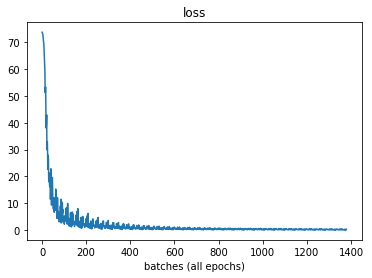

In [16]:
# Initialization of all variables in the graph
init = tf.global_variables_initializer()

#Init your session, run training
#Render your graph and monitor your training procedure using TensorBoard
with tf.Session() as sess: 
    sess.run(init)
    
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    losses = []
    accuracy_train = []
    accuracy_test = []
    for e in range(num_epochs):
        
        for i in range(X_train.shape[0] // batch_size):
            
            # Build batches of batch_size            
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train_onehot[idx: idxn]            
            
            # Run train operator for the current batch and save/monitor loss.
            _, l, summary_result = sess.run([train_op, loss, merged_summary_op], 
                                            feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
            #summary_result = sess.run(merged_summary_op, feed_dict={X: X_test, y: y_test_onehot})
            summary_writer.add_summary(summary_result, e * batch_size + i)
        
        #to-do: For each epoch, run accuracy on train and test.
        predicts_test = sess.run([predicts], feed_dict = {X: X_test})
        predicts_train = sess.run([predicts], feed_dict = {X: X_train})
        
        #to-do: call the accuracy function to compute accuracy scores and print them
        acc_train = accuracy(predicts_train, y_train)
        acc_test = accuracy(predicts_test, y_test)
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f"
              % (e, acc_train, acc_test))
        accuracy_train.append(acc_train)
        accuracy_test.append(acc_test)
    
    # For monitoring purposes
    #file_writer = tf.summary.FileWriter('./tensorflow_summaries', sess.graph)


plt.plot(losses)
plt.title('loss')
plt.xlabel('batches (all epochs)')

#to-do Do not forget to USE TENSORBOARD for graph rendereing + monitoring your training process 
print("\n got manually inside the anaconda directory and then right-click open terminal and run:\n" \
          "--> source bin/activate \n" \
          "--> cd envs \n" \
          "--> source activate name_of_your_project_env \n" \
          "--> tensorboard --logdir=./tensorflow_summaries --port 6006 " \
          "\nThen follow the suggested link or go manually to http://0.0.0.0:6006/ into your web browser")

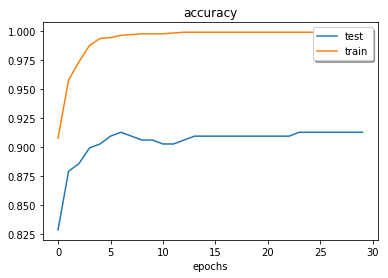

In [17]:
fig, ax = plt.subplots()
ax.plot(accuracy_test, label='test')
ax.plot(accuracy_train, label='train')
plt.title('accuracy')
plt.xlabel('epochs')
legend = ax.legend(loc='upper right', shadow=True)
plt.show()


### 3) In order to maximize the accuracy on the given dataset try different settings for your model

Play around with the structure of your NN model and fine-tune its hyperparameters.

- A. Experiment with di fferent hyperparameters (learning rate = 0.001,..,0.1, batch size = 8,..,128, size of hidden layers = 5,..,25, number of epochs).
- B. Try di fferent activation functions (e.g., ReLU, TanH).
- C. Try to add more hidden layers and increase their size.
- D. Add L2 regularization (e.g., with regularization strength 10^(-4))

### Bonus: A + 15% will be distributed to the top-performing models based on the accuracy on the test set (e.g if there are K submissions with equal top performance, each one will get a bonus 15%/K)

In [ ]:
#to-do- MAXimize the accuracy on the given dataset try different settings for your model
